

<font size="6"><span style="font-weight:bold;">**Medical Instrument Classification and Detection with YOLO and Python**</span></font>


<br>
<font size="4"><span style="font-weight:bold;"></span> Carlos Saico</font>


<font size="5" color="orange"><b>**Dataset Exploration**</b></font>


<font size="4" >For this practice, the Medical Waste Recognition dataset was chosen, which contains 2,268 images of 12 categories of medical utensils.</font>

<font size="4" >**Classes:** 'IVtube', 'bandage', 'cotton', 'gloves', 'mask', 'medical cap', 'needle', 'scissors', 'syringe', 'test tube', 'vial', 'waste'</font>

<font size="4" >**URL:** https://universe.roboflow.com/medical-waste-recognition/project4-vvgs8</font>


| Dataset | Number of Samples | Dimensions per Frame | Classes |
| --- | --- | --- | --- |
| Medical Waste Recognition | 2268 | 640x640 | 12 |


<font size="5" color="orange"><b>**Pretrained Network Content**</b></font>


<font size="4" >In this practice, the pretrained Yolov5 network (**You Only Look Once**) will be implemented. YOLO is a real-time object detection algorithm that uses a single neural network to predict bounding boxes and class probabilities for objects in an image.</font>


The **overall architecture** of YOLOv5 is composed of three main components:  
- **Backbone:** Responsible for extracting the key features from an input image.  
- **Neck:** Connects the backbone to the head and primarily builds feature pyramids to aggregate information from different stages.  
- **Head:** Contains the output layers that generate the final object detections.  

By default, YOLOv5 outputs a list of detections, where each detection consists of 5 elements: X, Y, W, H, and CONFIDENCE.  
- **X:** Horizontal coordinate of the left edge of the bounding box.  
- **Y:** Vertical coordinate of the top edge of the bounding box.  
- **W:** Width of the bounding box.  
- **H:** Height of the bounding box.  

It is important to note that these are the default outputs of YOLOv5. If the network is trained to detect 12 different objects, the total number of output elements per detection becomes 17.


<font size="5" color="orange"><b>**Neural Network Training**</b></font>


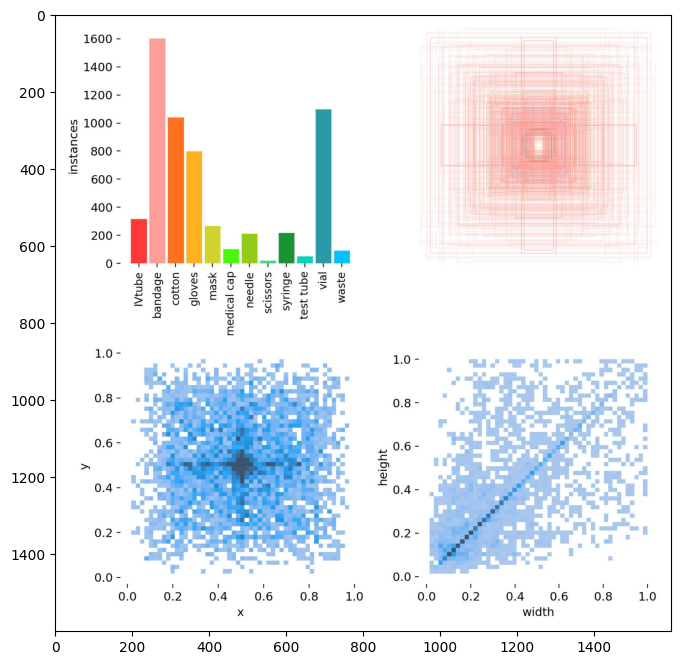

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/yolov5/runs/train/exp/labels.jpg')

# Specify the size of the figure (width x height)
plt.figure(figsize=(10, 8))

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


This figure presents the frequency analysis of the 12 classes, revealing a strong imbalance and underfitting. Classes like **bandage** (~1,600 instances) and **vial** (~1,200 instances) are well-represented, while **medical cap**, **scissors**, **test tube**, and **waste** have very few samples (less than 200).  

As a result, classes with over 600 samples are expected to achieve good prediction accuracy, whereas classes with fewer samples may yield less reliable predictions.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-283-g875d9278 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
!unzip /content/drive/MyDrive/ObjetosMedicos.zip -d /content/

Archive:  /content/drive/MyDrive/ObjetosMedicos.zip
   creating: /content/ObjetosMedicos/
  inflating: /content/ObjetosMedicos/README.dataset.txt  
  inflating: /content/ObjetosMedicos/README.roboflow.txt  
  inflating: /content/ObjetosMedicos/data.yaml  
   creating: /content/ObjetosMedicos/test/
   creating: /content/ObjetosMedicos/test/images/
  inflating: /content/ObjetosMedicos/test/images/BANDAGE-106-_jpg.rf.f7b0492b0c28b588e5085409d408d1a0.jpg  
  inflating: /content/ObjetosMedicos/test/images/BANDAGE-118-_jpg.rf.268f80c7d92a3321b16ce4e55fe8f7c5.jpg  
  inflating: /content/ObjetosMedicos/test/images/BANDAGE-14-_jpg.rf.67a67eda9f42107c2228b084a777a04d.jpg  
  inflating: /content/ObjetosMedicos/test/images/BANDAGE-17-_jpg.rf.d0617fb4c33e019322d1a17d3fc90fad.jpg  
  inflating: /content/ObjetosMedicos/test/images/BANDAGE-186-_jpg.rf.d3cc0875d77592b028b40d22f41b4666.jpg  
  inflating: /content/ObjetosMedicos/test/images/BANDAGE-205-_jpg.rf.ddda0696ddc87dd0748ef41f8591ca37.jpg  
  inf

Para el enteenamiento se usarán los siguientes parámetros:
- **bacth_size:** 10
- **epochs:** 45

In [ ]:
!python train.py --img 640 --batch 10 --epochs 45 --data /content/yolov5/data/obmedicos.yaml --weights yolov5l.pt --cache

2024-02-05 17:08:08.420890: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 17:08:08.420936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 17:08:08.426889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5l.pt, cfg=, data=/content/yolov5/data/obmedicos.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=45, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False

In [ ]:
from google.colab import files

# Ruta del modelo ONNX en Google Colab
modeloFY = '/content/yolov5/runs/train/exp/weights/best.pt'

# Descargar el modelo desde Google Colab
files.download(modeloFY)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
tabla = pd.DataFrame(columns=('Class', 'Precision', 'Recall'))
tabla.loc[len(tabla)]=['IVtube',0.86, 0.577]
tabla.loc[len(tabla)]=['bandage',0.885, 0.892]
tabla.loc[len(tabla)]=['cotton',0.723, 0.53]
tabla.loc[len(tabla)]=['gloves',0.905, 0.594]
tabla.loc[len(tabla)]=['mask',0.954, 0.688]
tabla.loc[len(tabla)]=['medical cap',0.713, 0.889]
tabla.loc[len(tabla)]=['needle',0.842, 0.5]
tabla.loc[len(tabla)]=['scissors',1, 0]
tabla.loc[len(tabla)]=['syringe',0.915, 0.567]
tabla.loc[len(tabla)]=[' test tube ',0, 0]
tabla.loc[len(tabla)]=['vial',0.867, 0.768]
tabla.loc[len(tabla)]=['waste',0.525, 0.417]
tabla.loc[len(tabla)]=['All',0.766, 0.535]
tabla.head(13)

,Class,Precision,Recall
0,IVtube,0.860,0.577
1,bandage,0.885,0.892
2,cotton,0.723,0.530
3,gloves,0.905,0.594
4,mask,0.954,0.688
5,medical cap,0.713,0.889
6,needle,0.842,0.500
7,scissors,1.000,0.000
8,syringe,0.915,0.567
9,test tube,0.000,0.000


The table shows the different quality metrics for each of our classes. Many classes exhibit very good values; for example, **gloves** achieves a precision of **0.905**, which can be attributed to having more than 800 samples. Similarly, the class **bandage**, with over 1,400 samples, has a good precision of **0.885**. Although not the highest, this is acceptable, meaning predictions for these classes are likely to be accurate.  

On the other hand, the class **test tube** has a very poor metric of 0, since, as mentioned, it has very few samples (less than 200). There is also an inconsistency in the class **scissors**, which shows a precision of **1** but a recall of **0**, being the class with the fewest possible samples. Therefore, the model will not make accurate predictions for this class, and if it does, the predictions are essentially random.


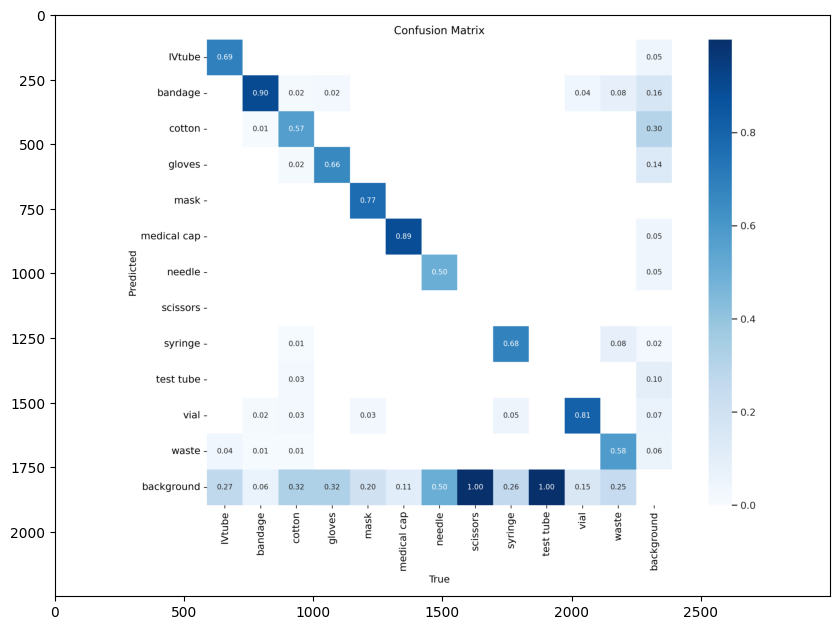

In [ ]:
# Load image
image = cv2.imread('/content/yolov5/runs/train/exp/confusion_matrix.png')
# Specify the size of the figure (width x height)
plt.figure(figsize=(10, 8))
# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


This illustration shows the confusion matrix, which indicates that most classes are being classified correctly and are not being confused with others. However, as mentioned with the quality metrics for **scissors** and **test tube**, they show a precision of 1 but a recall of 0. This means that while positive cases were identified, the model failed to detect all actual positives, resulting in incorrect predictions for these classes.


<font size="5" color="orange"><b>**Prediction**</b></font>


In [ ]:
#Predicción con un nuevo sample
!python detect.py --weights "/content/yolov5/runs/train/exp/weights/best.pt" --img 640 --conf 0.25 --source "/content/prueba1.png"

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/prueba1.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-279-g72749c1c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46167513 parameters, 0 gradients, 107.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/prueba1.png: 384x640 4 bandages, 18 cottons, 1 syringe, 6 vials, 50.5ms
Speed: 0.5ms pre-process, 50.5ms inference, 646.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


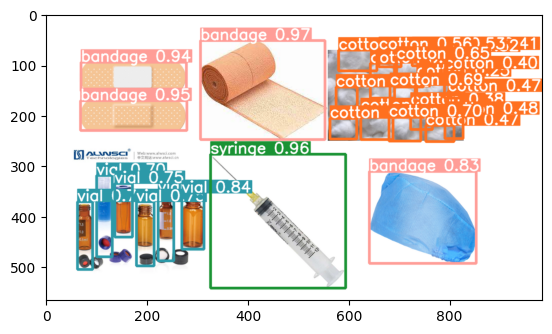

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load image
image = cv2.imread('/content/yolov5/runs/detect/exp/prueba1.png')

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


The presented image shows the results of predictions made on a new sample. We can see that the model successfully detects multiple classes within the same image, reflecting the accuracy with which it classifies each class. However, an error is observed: the image contains a **medical cap**, which was incorrectly classified as a **bandage**. According to the frequency analysis, this class has fewer than 200 images, which may explain the misclassification. Despite this, the class achieved a precision of **0.713**.


In [ ]:
!python detect.py --weights "/content/yolov5/runs/train/exp/weights/best.pt" --img 640 --conf 0.25 --source "/content/prueba2.png"

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/prueba2.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-279-g72749c1c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46167513 parameters, 0 gradients, 107.8 GFLOPs
image 1/1 /content/prueba2.png: 352x640 1 mask, 1 medical cap, 4 vials, 51.4ms
Speed: 0.5ms pre-process, 51.4ms inference, 543.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


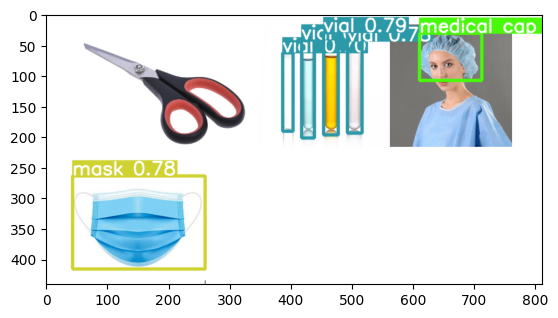

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load image
image = cv2.imread('/content/yolov5/runs/detect/exp6/prueba2.png')

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


Another prediction was performed to evaluate the results for the classes with lower precision. As observed, the class **scissors** is not even detected as one of the trained objects, while **test tube** is poorly classified as **vial**. To address this, more samples of these classes need to be added so the model can learn their representative features and classify them correctly.  

Additionally, two classes, **mask** and **medical cap**, were included and are being classified very accurately.


<font size="5" color="orange"><b>**Conclusion**</b></font>


For this practice, we used the pretrained YOLOv5 network, achieving very good results due to the number of samples available for each class. However, the dataset was highly imbalanced, resulting in **underfitting**. The class **bandage** has nearly 1,600 instances, and **vial** contains around 1,200 samples. In contrast, **medical cap**, **scissors**, **test tube**, and **waste** have very few samples, fewer than 200 instances.  

As expected, classes with more than 600 samples yielded good quality metrics, while classes with fewer than 600 samples produced less accurate predictions. In particular, predictions for **scissors** and **test tube** were poor due to insufficient sample sizes.  

For training, the following parameters were used:  
- **batch_size:** 10  
- **epochs:** 45  

These settings produced optimal results, achieving an overall **precision** of **0.766** and a **recall** of **0.535**.  

Classes with the highest precision were:  
- **mask: 0.954**  
- **syringe: 0.915**  
- **gloves: 0.905**  

Classes with the lowest precision were:  
- **test tube: 0.000**  
- **scissors: 1.000**  
- **waste: 0.525**  

These metrics were validated by predicting a new sample, which showed that the model classified well-represented classes accurately, while classes with low precision were either misclassified or not detected at all. These results can be improved by adding more samples to underrepresented classes to achieve a balanced dataset and prevent **underfitting**.  

In conclusion, the objectives of this practice were met: we trained a model capable of recognizing multiple objects within a single image and analyzed the results to guide improvements for the model.


<font size="5" color="orange"><b>**References**</b></font>


- Juanagogoo. (2023). COMO entrenar una RED NEURONAL YoloV5 con DATOS PERSONALIZADOS [Video]. YouTube. https://www.youtube.com/watch?v=ysYwaCmYKe0&t=497s&ab_channel=Juanagogoo
- Roboflow. (s.f.). Medical Waste Recognition project4 Computer Vision Project. Recuperado de https://universe.roboflow.com/medical-waste-recognition/project4-vvgs8